In [1]:
# import thư viện
import pathlib
import subprocess
from dataclasses import dataclass
from typing import Literal, Optional, Tuple

import numpy as np
import PIL
import torch
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

```process_img function:```

- Hàm này nhận đường dẫn của một ảnh và kích thước mong muốn, sau đó thực hiện các bước xử lý để chuẩn bị dữ liệu hình ảnh.
def process_img(path: pathlib.Path, size: Tuple[int, int]):: Đây là khai báo hàm process_img nhận vào hai tham số - path là đường dẫn đến hình ảnh và size là kích thước mong muốn của hình ảnh đầu ra.

- img = PIL.Image.open(path): Mở hình ảnh từ đường dẫn path bằng thư viện PIL (Python Imaging Library) và lưu nó vào biến img.

- img = img.resize(size, resample=PIL.Image.BILINEAR): Thay đổi kích thước của hình ảnh (img) thành kích thước mong muốn (size). Phương pháp resample được chọn là PIL.Image.BILINEAR, có nghĩa là sử dụng phương pháp nội suy tuyến tính khi thay đổi kích thước.

- img = img.convert("L"): Chuyển đổi hình ảnh thành ảnh grayscale (ảnh đen trắng) bằng cách sử dụng phương pháp chuyển đổi màu "L" của PIL.

- img = np.array(img): Chuyển đổi hình ảnh từ định dạng PIL Image sang mảng NumPy.

- img = img.astype(np.float32): Chuyển đổi kiểu dữ liệu của mảng NumPy thành kiểu dữ liệu float32. Điều này làm cho giá trị của pixel trong hình ảnh trở thành các số thực từ 0 đến 255.

- return img: Trả về mảng NumPy chứa hình ảnh đã được xử lý.

In [2]:
def process_img(path: pathlib.Path, size: Tuple[int, int]):
    img = PIL.Image.open(path)
    img = img.resize(size, resample=PIL.Image.BILINEAR)
    img = img.convert("L")
    img = np.array(img)
    img = img.astype(np.float32)
    return img

***Minh họa cách chạy:***

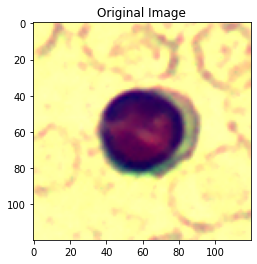

Chiều của ảnh gốc:
(120, 120, 3)


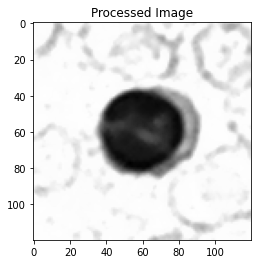

Chiều của ảnh processed:
(120, 120)


In [3]:
# Đường dẫn đến hình ảnh 
img_path = "001.bmp"
# Kích thước mong muốn
size = (120, 120)  # Size ảnh gốc có thể chọn size khác

# Hiển thị hình ảnh gốc
img_original = PIL.Image.open(img_path)
plt.imshow(img_original)
plt.title("Original Image")
plt.show()
img_array = np.array(img_original)
plt.imshow(img_array)

print("Chiều của ảnh gốc:")
print(img_array.shape)

# Hiển thị hình ảnh đã qua xử lý
img_processed = process_img(img_path, size)
plt.imshow(img_processed, cmap='gray')
plt.title("Processed Image")
plt.show()
print("Chiều của ảnh processed:")
print(img_processed.shape)


```process_seg function:```

- seg = PIL.Image.open(path): Mở hình ảnh segmentation từ đường dẫn path bằng thư viện PIL (Python Imaging Library) và lưu nó vào biến seg.

- seg = seg.resize(size, resample=PIL.Image.NEAREST): Thay đổi kích thước của hình ảnh segmentation thành kích thước mong muốn (size) bằng cách sử dụng phương pháp NEAREST để giữ nguyên giá trị pixel của các điểm ảnh sau khi thay đổi kích thước. Phương pháp NEAREST sử dụng phép lấy mẫu gần nhất, nghĩa là giá trị của điểm ảnh mới sẽ được lấy từ điểm ảnh gần nhất trong ảnh gốc.

- seg = np.array(seg): Chuyển hình ảnh segmentation thành một mảng NumPy để dễ dàng xử lý.

- seg = np.stack([seg == 0, seg == 128, seg == 255]): Tạo một mảng 3D (tensor) trong đó mỗi kênh (chiều) của mảng tương ứng với một lớp trong hình ảnh segmentation. Ví dụ, kênh đầu tiên sẽ là một mảng Boolean có giá trị True ở những vị trí mà giá trị pixel của hình ảnh là 0 và False ở những vị trí khác. Tương tự, kênh thứ hai và kênh thứ ba tương ứng với giá trị pixel là 128 và 255.

*Vì ảnh segmentation chỉ có 3 giá trị là 0, 128 và 255 cho từng vùng*

- seg = seg.astype(np.float32): Chuyển đổi các giá trị Boolean trong mảng thành các giá trị số thực (float32). Trong ngữ cảnh này, giá trị True được chuyển thành 1.0 và giá trị False được chuyển thành 0.0.

- return seg: Trả về mảng NumPy đã xử lý làm đầu ra của hàm.

In [4]:
def process_seg(path: pathlib.Path, size: Tuple[int, int]):
    seg = PIL.Image.open(path)
    seg = seg.resize(size, resample=PIL.Image.NEAREST)
    seg = np.array(seg)
    seg = np.stack([seg == 0, seg == 128, seg == 255])
    seg = seg.astype(np.float32)
    return seg

*Minh họa code:*

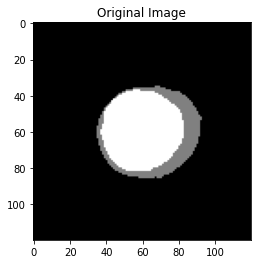

Chiều của ảnh gốc:
(120, 120)


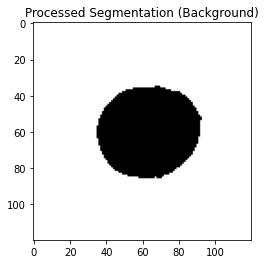

Chiều của ảnh 1:
(120, 120)


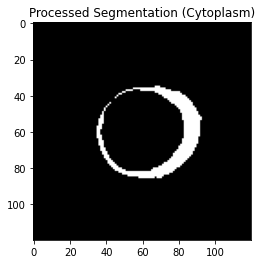

Chiều của ảnh 2:
(120, 120)


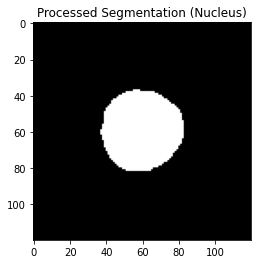

Chiều của ảnh 3:
(120, 120)


In [5]:
# Đường dẫn đến segmentation (đặt đúng đường dẫn thực tế trên máy của bạn)
seg_path = "001.png"

# Kích thước mong muốn
size = (120, 120)

img_original = PIL.Image.open(seg_path)

plt.imshow(img_original, cmap='gray')
plt.title("Original Image")
plt.show()
img_array = np.array(img_original)
print("Chiều của ảnh gốc:")
print(img_array.shape)

# Hiển thị segmentation
seg = process_seg(seg_path, size)
plt.imshow(seg[0], cmap='gray')  # Hiển thị lớp background
plt.title("Processed Segmentation (Background)")
plt.show()
print("Chiều của ảnh 1:")
print(seg[0].shape)

plt.imshow(seg[1], cmap='gray')  # Hiển thị lớp cytoplasm
plt.title("Processed Segmentation (Cytoplasm)")
plt.show()
print("Chiều của ảnh 2:")
print(seg[1].shape)

plt.imshow(seg[2], cmap='gray')  # Hiển thị lớp nucleus
plt.title("Processed Segmentation (Nucleus)")
plt.show()
print("Chiều của ảnh 3:")
print(seg[2].shape)


```load_folder function:```
- Hàm này nhận một đường dẫn thư mục và kích thước mong muốn, sau đó tải và xử lý tất cả các ảnh và segmentation trong thư mục đó.
- Ở đây, chỉ các tệp tin có định dạng ".bmp" được xử lý, và segmentation được tìm kiếm với định dạng ".png".
- Dữ liệu được chuẩn bị trong dạng tuple (ảnh, segmentation), với ảnh được chuẩn hóa bằng cách chia cho 255.0 để nằm trong khoảng từ 0 đến 1.

*load ảnh từ folder cần thiết vào để huấn luyện*

In [6]:
def load_folder(path: pathlib.Path, size: Tuple[int, int] = (128, 128)):
    data = []
    for file in sorted(path.glob("*.bmp")):
        img = process_img(file, size=size)
        seg_file = file.with_suffix(".png")
        seg = process_seg(seg_file, size=size)
        data.append((img / 255.0, seg))
    return data

```require_download_wbc function:```

- Hàm này đảm bảo rằng dữ liệu từ tập dữ liệu WBC đã được tải xuống và được lưu trữ tại một đường dẫn cụ thể trong thư mục tạm thời. (không tạo thư mục mới)

In [7]:
def require_download_wbc():
    dest_folder = pathlib.Path("/tmp/universeg_wbc/")

    if not dest_folder.exists():
        repo_url = "https://github.com/zxaoyou/segmentation_WBC.git"
        subprocess.run(
            ["git", "clone", repo_url, str(dest_folder),],
            stderr=subprocess.DEVNULL,
            check=True,
        )

    return dest_folder

```WBCDataset class:```

- Lớp này là một PyTorch Dataset được thiết kế để làm việc với tập dữ liệu WBC.
- Constructor của lớp này đảm bảo rằng dữ liệu đã được tải xuống và chuẩn bị dưới dạng tensor PyTorch.
- Hàm __getitem__ trả về một cặp (ảnh, segmentation) từ tập dữ liệu theo chỉ số được chỉ định.

In [8]:
@dataclass
class WBCDataset(Dataset):
    dataset: Literal["JTSC", "CV"]
    split: Literal["support", "test"]
    label: Optional[Literal["nucleus", "cytoplasm", "background"]] = None
    support_frac: float = 0.7

    def __post_init__(self):
        root = require_download_wbc()
        path = root / {"JTSC": "Dataset 1", "CV": "Dataset 2"}[self.dataset]
        T = torch.from_numpy
        self._data = [(T(x)[None], T(y)) for x, y in load_folder(path)]
        if self.label is not None:
            self._ilabel = {"cytoplasm": 1, "nucleus": 2, "background": 0}[self.label]
        self._idxs = self._split_indexes()

    def _split_indexes(self):
        rng = np.random.default_rng(42)
        N = len(self._data)
        p = rng.permutation(N)
        i = int(np.floor(self.support_frac * N))
        return {"support": p[:i], "test": p[i:]}[self.split]

    def __len__(self):
        return len(self._idxs)

    def __getitem__(self, idx):
        img, seg = self._data[self._idxs[idx]]
        if self.label is not None:
            seg = seg[self._ilabel][None]
        return img, seg


#### @dataclass: Đây là một decorator tự động tạo ra các phương thức đặc biệt như init() và repr() dựa trên các thuộc tính của lớp. Nó được sử dụng để định nghĩa lớp một cách ngắn gọn.

In [10]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"Person(name='{self.name}', age={self.age})"
    
# Sử dụng lớp không sử dụng @dataclass
person1 = Person("Alice", 30)
print(person1)

Person(name='Alice', age=30)


In [11]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int

# Sử dụng lớp sử dụng @dataclass
person2 = Person(name="Bob", age=25)
print(person2)

Person(name='Bob', age=25)


Ở đây, @dataclass tự động tạo các phương thức đặc biệt như __init__() và __repr__() dựa trên các thuộc tính được định nghĩa trong lớp. Việc này làm cho mã nguồn ngắn gọn và dễ đọc.

#### Ý nghĩa của từng trường là:

dataset: Một biến có thể nhận một trong hai giá trị "JTSC" hoặc "CV". Literal type hint được sử dụng để chỉ định rõ các giá trị hợp lệ cho biến này.

split: Một biến có thể nhận một trong hai giá trị "support" hoặc "test". Cũng giống như dataset, Literal type hint được sử dụng để xác định rõ các giá trị hợp lệ.

label: Một biến có thể nhận một trong ba giá trị "nucleus", "cytoplasm", "background" hoặc giá trị None (mặc định). Optional được sử dụng để cho phép giá trị None.

support_frac: Một biến kiểu số thực (float) có giá trị mặc định là 0.7.

In [17]:
import itertools
d_support = WBCDataset('JTSC', split='support', label='cytoplasm')
d_test = WBCDataset('JTSC', split='test', label='cytoplasm')
print(d_support)
n_support = 48

support_images, support_labels = zip(*itertools.islice(d_support, n_support))

WBCDataset(dataset='JTSC', split='support', label='cytoplasm', support_frac=0.7)


In [26]:
print(support_images[0].shape)
print(support_images[47].shape)
print(support_labels[0].shape)
print(support_labels[47].shape)
# Lấy 48 ảnh ứng với 48 labels


torch.Size([1, 128, 128])
torch.Size([1, 128, 128])
torch.Size([1, 128, 128])
torch.Size([1, 128, 128])


#### support_images = torch.stack(support_images).to(device)

Chuyển đổi List thành Tensor: Trước tiên, support_images được giả sử là một list chứa các tensor, mỗi tensor là một ảnh từ dataset. Hàm torch.stack(support_images) sẽ chuyển đổi danh sách này thành một tensor mới, trong đó mỗi tensor con là một ảnh từ danh sách.

Chuyển Đổi Sang Thiết Bị (Device): Sau đó, .to(device) được sử dụng để chuyển tensor này lên thiết bị đã được chỉ định (có thể là 'cuda' nếu GPU có sẵn hoặc 'cpu' nếu không có GPU). Điều này giúp tận dụng hiệu suất của GPU khi thực hiện các phép toán.

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
support_images, support_labels = zip(*itertools.islice(d_support, n_support))
support_images = torch.stack(support_images)
support_labels = torch.stack(support_labels)
print(support_images.shape)
#Chuyển thành 48 tensors không còn là tuple nữa
support_images = support_images.to(device)
support_labels = support_labels.to(device)

torch.Size([48, 1, 128, 128])


2
5
2


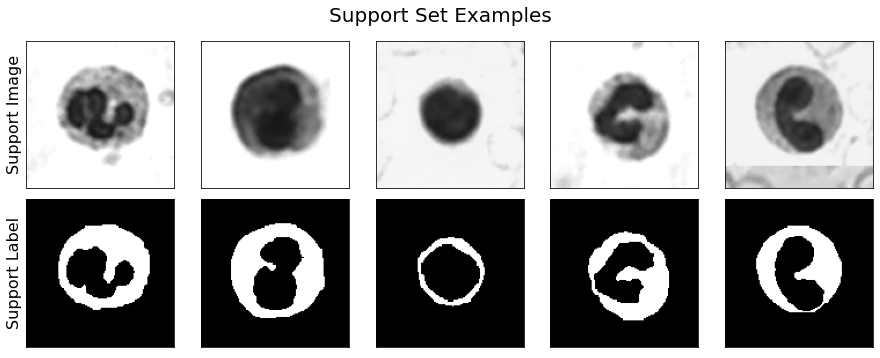

In [47]:
import math

def visualize_tensors(tensors, col_wrap=8, col_names=None, title=None):
    #tensors: Một từ điển với các tên nhóm và danh sách các tensors tương ứng.
    #col_wrap=8: Số lượng cột trong mỗi hàng của grid. Giá trị mặc định là 8. Số cột để vẽ hình
    #col_names=None: Tên của từng cột, sẽ hiển thị ở trên từng cột.
    #title=None: Tiêu đề của hình.
    M = len(tensors)
    print(M) #M: Số lượng nhóm (số lượng các loại tensor).
    N = len(next(iter(tensors.values())))
    print(N) # N: Số lượng tensor trong mỗi nhóm.
    cols = col_wrap
    rows = math.ceil(N/cols) * M
    print(rows) #Tròn lên(Số lượng tensors trong mỗi nhóm/ số cột) * M

    d = 2.5 #d: Hệ số để điều chỉnh kích thước của hình.
    #fig, axes: Tạo một figure và một mảng các subplot (axes).
    fig, axes = plt.subplots(rows, cols, figsize=(d*cols, d*rows)) 
    if rows == 1: 
      # Nếu chỉ có một hàng (rows == 1), reshape lại mảng axes thành dạng (1, cols).
      axes = axes.reshape(1, cols)
    
    # Vẽ từng tensors
    for g, (grp, tensors) in enumerate(tensors.items()):
        #g: Chỉ số của nhóm trong từ điển tensors.
        #grp: Tên của nhóm (ví dụ: "Support Image").
        #tensors: lưu các tensors của nhóm đó

        for k, tensor in enumerate(tensors):
            col = k % cols
            row = g + M*(k//cols)
            x = tensor.detach().cpu().numpy().squeeze()
            ax = axes[row,col]
            if len(x.shape) == 2:
                ax.imshow(x,vmin=0, vmax=1, cmap='gray')
            else:
                ax.imshow(E.rearrange(x,'C H W -> H W C'))
            if col == 0:
                ax.set_ylabel(grp, fontsize=16)
            if col_names is not None and row == 0:
                ax.set_title(col_names[col])
        

    for i in range(rows):
        for j in range(cols):
            ax = axes[i,j]
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
    
    if title:
        plt.suptitle(title, fontsize=20)
            
    plt.tight_layout()

n_viz = 5
visualize_tensors({
    'Support Image': support_images[:n_viz],
    'Support Label': support_labels[:n_viz],
}, col_wrap=5, title='Support Set Examples')

### Tóm lại:
- Code này tạo ra tập train và tập test, mỗi tập chỉ có 48 ảnh 